In [6]:
# this file is going to be an early version of bbal simulation
# this will exclude player attributes
# simulation will stop when time_elapsed reaches time_allotted (value of time_allotted depends on league)
# going to assign random probability and time elapsed for each event (ie not based on team lineup)

# also may need to include date of game to properly adjust probabilities based on previuos games based on time since last game
# need to include shot clock turnover

################## NEED TO IMPLEMENT WHEN TEAM FOULS RESET
import random
import copy
import time
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
# objects of type SimData represent the objects used to simulate the data and use it
#
#
class SimData:
    
    # Constructor for object of type SimData
    #
    # @param (Game) initialGameObject - this is the current state of the game represented by real play that is to be simulated
    #
    # also instantiates scores list
    def __init__(self, initialGameObject):
        self.initialGame = initialGameObject
        self.scores = []
        
    # this method takes simulates the initialGameObject n times
    #
    # @param (int) n - this is the number of times for the initialGameObject to be simulated
    #
    # @return (list, 2 elements) - scores (or maybe adds it to instance var)
    # not sure but maybe print out 3d prob distr graph
    # 
    def simulateGames(self, n):
        object_list = []
        scores = []
        for i in range(n):
            copy_initGame = copy.deepcopy(self.initialGame)
            object_list.append(copy_initGame)
        for i in range(n):
            object_list[i].tipOff()
            scores.append(object_list[i].getScore())
        return scores
            
        

In [8]:
# what to do when event A is selected
# when event A is selected, an amount of time t will pass, home score and away score may change
# as well as foul count for team (and personal when players are included)


# the event "A possesion", has properties, 
# time elapsed during event
# successive events
# the property successive events consinsts of the entire space of events that follow event "A possession"
# each of the successive events has the property, probability of event
# once the comp picks a successive event based on probabilty of the events, that event function will be called

# event
# team
# game
# player
# I think these 4 object types will do
# game will be the "parent" object as all other objects will be properties/methods of the game object


# objects of type Game represent the state of a basketball game (and it's predicts with some accuracy its time evolution?)
# make sure to construct class in such a way that a game that doesn't start at 0-0 or at t=0 can be instantiated
# 
#currently omitting player objects in construction for simplification
class Game:
    
    # Constructor for an object of type Game
    # 
    # @param (Team) home_team - this is the home team object
    # 
    # @param (Team) away_team - this is the away team object
    # 
    # @param (list, 2 elements) score - this is the current/initial score of game, format: [home_score, away_score]
    # default for score param: [home_score=0, away_score=0]
    # 
    # @param (list, 2 elements) fouls - this is the current/inital team fouls for each team
    # format for fouls param: [home_fouls, away_fouls]
    # default for fouls param: [home_fouls=0, away_fouls=0]
    # 
    # @param (double) time_elapsed - this is the time already passed in the game
    # default for time_elapsed: time_elapsed=0, this represents a game that has not started yet
    #
    # @param (string) league - this is the string representation of the league the game is played in
    # the signifance of the league is the rules the game abides by
    # examples: time allotted, when team fouls reset, when a player is fouled out, shot clock time, and bonus rules
    # default for league: league='NBA'
    #
    def __init__(self, home_team, away_team, score=[0,0], team_fouls=[0,0], time_elapsed=0, league='NBA'):
        self.home_team = home_team
        self.away_team = away_team
        self.home_score = score[0]
        self.away_score = score[1]
        self.home_fouls = team_fouls[0]
        self.away_fouls = team_fouls[1]
        self.time_elapsed = time_elapsed
        self.league = league
        
        if (league == 'NBA'):
            self.time_allotted = 48 * 60 # measured in seconds
            self.period_count = 4 # there are 4 quarters, this is relevant in determining when team fouls are reset
            self.shot_clock_time = 24 # measured in seconds
            self.bonus_limit = 4 # after 4 fouls and up, bonus is activated (single bonus in nba)
            # self.personal_foul_limit = 5 # if a player exceeds the personal foul limit, then they cannot play the rest of the game
        
        elif (league == 'NCAA'):
            self.time_allotted = 40 * 60
            self.period_count = 2
            self.shot_clock_time = 30
            self.single_bonus_limit = 6 # after 6 fouls, single bonus is active
            self.double_bonus_limit = 9 # after 9 fouls, double bonus is active
            # self.personal_foul_limit = 4
            
        else:
            print('Please enter a valid league')
            
        # compute self.currenty period var (using for when to reset team fouls)
        # compute the intervals that determine when periods start and end in terms of the given variables
        # the given (relevant) variables are time_alloted, and period count
        #endpoints = []            
        #self.current_period =
        self.game_log = []
        # format: [event name, offensive_team, time elapsed, score, fouls]
        # time elapsed, score, and fouls would indicate the game state AFTER the event occurs
        # want game log function that takes in event name, and adds to game log
            
####################################### need to implement when to reset team fouls


    # this method gets the current score of the game object
    #
    # @return (list, 2 elements) score - this is the current score of teh game
    # format: score = [home_score, away_score]
    #
    def getScore(self):
        score = [self.home_score, self.away_score]
        return score

    

    # this method adds the event that just occured to the game log
    #
    # @param (string) event_name - this is the event that just occured
    #
    # @param (Team) offensive_team - this is the offensive team during the event
    #
    def addEvent(self, event_name, offensive_team):
        score = (self.home_score, self.away_score)
        fouls = (self.home_fouls, self.away_fouls)
        log_instance = [event_name, offensive_team, self.time_elapsed, score, fouls]
        
        self.game_log.append(log_instance)
        
    
    # possession is an event
    # this event effects the time elapsed and the possible/probable succesive events
    #
    # @param (Team) offensive_team - this is defined as the offensive team
    #
    # factoring in probability and time elapsed based on teams & players will be omitted for now for simplification
    def possession(self, offensive_team):
        
        
        # generating a random length of possession
        t = random.random() * self.shot_clock_time
        
        # adding the time taken for possession to time_elapsed
        self.time_elapsed += t
        # want to reset fouls if time elapsed changes to a time in another period
        # if elap < k * time_alot/period, k is between 1 and period
        # and elap + t >= k * time_alot/period
        # then reset team fouls
        
        event_name = 'possession'
        self.addEvent(event_name, offensive_team)
        
        # stopping game if time allotted is exceeded
        if (self.time_elapsed >= self.time_allotted) :
            # not sure if this actually stops the game tho
            #print('Home Score:', self.home_score)
            #print('\nAway Score:', self.away_score)
            return self
        
        else :
            # if game is not over, genarate random number between 0 and 1
            # then create if and elif statements for each successive event
            # the successive events for a possession are
            # 
            # non-foul turnover
            # offensive foul
            # defensive foul
            # 2pt shot att
            # 3pt shot att
            
            # next thing I want to do is create methods for each of those events
            # first will write out with methods for each event doing nothing
            
            p = random.random() # p is between 0 and 1
            
            # arbitraly assigning each event with equal probability
            event_count = 5
            cutoff = 1 / event_count
            
            if (p < cutoff) : # case for non-foul turnover
                self.turnover(offensive_team)
                
            elif (p >= cutoff and p < 2 * cutoff) : # case for offensive foul
                self.offensiveFoul(offensive_team)
            
            elif (p >= 2 * cutoff and p < 3 * cutoff) : # case for defensive foul
                self.defensiveFoul(offensive_team)
            
            elif (p >= 3 * cutoff and p < 4 * cutoff) : # case for 2pt shot att
                self.shotAtt(offensive_team, '2pt')
            
            elif (p >= 4 * cutoff) : # case for 3pt shot att
                self.shotAtt(offensive_team, '3pt')
            
            
    
    # turnover is an event
    # this event changes possesion from home to away or vise versa
    #
    # @param (Team) offensive_team - this is defined as the team who lost possession (previously the offensive team)
    #
    def turnover(self, offensive_team):
        # this event has no time elapsed, it just changes the event
        defensive_team = self.oppTeam(offensive_team)
        
        event_name = 'turnover'
        self.addEvent(event_name, offensive_team)
        
        self.possession(defensive_team)
    
    # offensiveFoul is an event
    # this event changes possession and adds 1 personal foul to the player who committed it
    #
    # @param (Team) offensive_team - this is defined as the offensive team
    #
    def offensiveFoul(self, offensive_team): # later add player foul count
        # this event has no time elapsed, it just changes events
        defensive_team = self.oppTeam(offensive_team)
        
        event_name = 'offensiveFoul'
        self.addEvent(event_name, offensive_team)
        
        self.possession(defensive_team)
        # also add one personal foul to player
        ##############
        
    
    # defensiveFoul is an event
    # this event (resets possession for offensive team or grants two free throws
    # adds 1 personal foul to the player who committed it
    # adds 1 team foul to the defensive team
    #
    # @param (Team) offensive_team - this is defined as the offensive team
    #
    # defensive fouls also count as loose-ball fouls
    #
    def defensiveFoul(self, offensive_team):
        # this event has no time elapsed
        # resets possesion for off team if under bonus
        
        event_name = 'defensiveFoul'
        self.addEvent(event_name, offensive_team)
        
        defensive_team = self.oppTeam(offensive_team)
        
        if (self.league == 'NBA'):
            
            self.teamFoul(defensive_team)
            
            if (self.teamFoulCount(defensive_team) <= self.bonus_limit):
                self.possession(offensive_team)
            
            else:
                self.ft2(offensive_team)
        
                    
        elif (self.league == 'NCAA'):
            
            self.teamFoul(defensive_team)
            
            if (self.teamFoulCount(defensive_team) <= self.single_bonus_limit):
                self.possession(offensive_team)
                
            elif (self.teamFoulCount(defensive_team) <= self.double_bonus_limit):
                self.singleBonus(offensive_team)
            
            else:
                self.ft2(offensive_team)
                
            
        
                
                    
    # shot attempt is an event
    # shot attempt includes 2pt att, 3pt att, and tip in atts
    # the similarities between the 3 shot types are the successive events for each
    # the differences between the 3, are time allotted, probability, and points awarded for successful shot
    #
    # @param (Team) offensive_team - this is defined as the offensive team
    #
    # @param (string (subject to change)) shot_type - this defined as the type of shot taken
    #
    def shotAtt(self, offensive_team, shot_type):
        # first need to impelement modifier
        #
        # shot att
        # successive events
        # shot make
        # shot miss
        # shot foul plus make
        # shot foul plus miss
        # offensive foul
        # defensive foul
        # 
        # will first implement code for a single instance of a shot type (3pt att)
        
        if (shot_type == '3pt' or shot_type == '2pt' or shot_type == 'tip in'): # inculding all temporarily ###case where 3 point shot is first shot of possession
            p = random.random() # assigning p to random number between 0 and 1
            
            event_name = shot_type + ' att'
            self.addEvent(event_name, offensive_team)
            # will have each event have equal probability for each event
            # going to look up average flight time of shot (maybe included in possession time tho idk)
            # will exclude time elapsed increase for now
            event_count = 6
            cutoff = 1 / event_count
            
            # may end up making function for testing which branch p leads to,
            # input of function would be p, and the endpoints for which it would need to be between for event to run
            if (p < cutoff):
                #shot make
                self.shotMake(offensive_team, shot_type)
                
            elif (p <= cutoff * 2):
                #shot miss
                self.shotMiss(offensive_team, shot_type)
                
            elif (p <= cutoff * 3):
                #shot foul plus make
                self.shotMake(offensive_team, shot_type, foul=True)
                
            elif (p <= cutoff * 4):
                #shot foul plus miss
                self.shotMiss(offensive_team, shot_type, foul=True)
                
            elif (p <= cutoff * 5):
                #offensive foul, non-shooting foul
                self.offensiveFoul(offensive_team)
            elif (p <= cutoff * 6):
                #defensive foul, non-shooting foul
                self.defensiveFoul(offensive_team)
        
    
    #need to make these methods
    #shot make
    #shot miss
    #shot foul plus make
    #shot foul plus miss
    
    # shot make is an event
    #
    # @param (Team) offensive_team - this is defined as the offensive team
    # 
    # @param (string) shot_type - this is defined as the type of shot (2pt, 3pt, tip in)
    #
    # @param (boolean) foul - this indicates if the shooter was fouled while shooting
    #
    def shotMake(self, offensive_team, shot_type, foul=False):
        # when shot is made, the points are awarded to offensive team, and possession to the opposite team
        defensive_team = self.oppTeam(offensive_team)
        
        self.changeScore(offensive_team, shot_type)
            
        event_name = shot_type + ' make w/o foul'
        self.addEvent(event_name, offensive_team)
        
        if (foul):
            # add one foul to defense
            # call ft1 method
            self.teamFoul(defensive_team)
            
            event_name = shot_type + ' make w/ foul'
            self.addEvent(event_name, offensive_team)
            
            self.ft1(offensive_team)    
            
        else:
            self.possession(defensive_team)
   

    # shot miss is an event
    # 
    # successive events - rebound
    # 
    # @param (Team) offensive_team - this is defined as the player's, who shot, team
    #
    # @param (string) shot_type - this is defines as the type of shot attempted
    #
    # @param (boolean) foul - this indicates if the shooter was fouled while shooting
    #
    def shotMiss(self, offensive_team, shot_type, foul=False):
        # when a shot is missed, the method shot_type rebound is called if not fouled
        # if fouled off team is given free throws (depending on shot type)
        # call rebound method
        
        event_name = shot_type + ' miss w/o foul'
        self.addEvent(event_name, offensive_team)
        
        if (foul):
            
            event_name = shot_type + ' miss w/ foul'
            self.addEvent(event_name, offensive_team)
            
            if (shot_type == '2pt' or 'tip in'): 
                self.ft2(offensive_team)
            elif (shot_type == '3pt'):
                self.ft3(offensive_team)
        else:
            self.rebound(offensive_team, shot_type)
    
    # rebound is an event
    #
    # @param (Team) offensive_team - this is defined as the player's, who shot, team
    #
    # @param (string) shot_type - this is defines as the type of shot attempted
    # note that the rebound methods also take in free throw, 'ft', as a shot type where the shotAtt method does not
    #
    def rebound(self, offensive_team, shot_type):
        # list successive events
        # offensive rebound (w/ shot type modifying prob of each)
        # defensive rebound
        # foul by offensive team
        # foul by defensive team (these would both count as loose-ball fouls ie adding to team foul count)
        
        defensive_team = self.oppTeam(offensive_team)
        
        if (shot_type == '3pt' or shot_type == '2pt' or shot_type == 'tip in' or shot_type == 'ft'):
            
            p = random.random() # generating random number (could initialize outside of if statement)
            
            event_count = 4
            cutoff = 1 / event_count
            
            event_name = shot_type + ' rebound'
            self.addEvent(event_name, offensive_team)
            
            if (p < cutoff):
                #offensive rebound
                self.offensiveRebound(offensive_team, shot_type)
                
            elif (p <= cutoff * 2):
                #defensive rebound
                self.defensiveRebound(offensive_team)
                
            elif (p <= cutoff * 3):
                #foul by offensive team
                self.defensiveFoul(offensive_team)
            
            elif (p <= cutoff * 4):
                #foul by defensive team
                self.defensiveFoul(defensive_team)
    
    # offensive rebound is an event
    #
    # @param (Team) offensive_team - this is defined as the player's, who shot, team
    #
    # @param (string) shot_type - this is defines as the type of shot attempted
    #
    # note that time passing may need to be included b/c idk when possession start time and end time specifically are
    #
    def offensiveRebound(self, offensive_team, shot_type):
        # when this happens, either there is a tip in attempt, or a reset of possession
        
        if (shot_type == '3pt' or shot_type == '2pt' or shot_type == 'tip in' or shot_type == 'ft'):
            
            p = random.random()
            
            event_count = 2
            cutoff = 1 / event_count
            
            event_name = shot_type + ' offensive rebound'
            self.addEvent(event_name, offensive_team)
            
            if (p < cutoff):
                #tip in att
                #not sure how to include previous shot type so will exclude for now
                self.shotAtt(offensive_team, 'tip in')
            
            elif (p <= cutoff * 2):
                #reset possession
                self.possession(offensive_team)
    
    # defensive rebound is an event
    #
    # @param (Team) offensive_team - this is defined as the player's, who shot, team
    #
    def defensiveRebound(self, offensive_team):
        # when defensive rebound, opposite team is given possesion
        defensive_team = self.oppTeam(offensive_team)
        
        event_name = 'defensive rebound'
        self.addEvent(event_name, offensive_team)
        
        self.possession(defensive_team)
    
    
    
    # there are 4 different kind of FT event, have seperate method for each event
    # 1 FT
    # 2 FT
    # 3 FT
    # single bonus
    
    # 1 free throw attempt is an event (not followed by another free throw)
    # case where only 1 free throw is given
    # this occurs when a shooting player is fouled during a shot and makes the shot
    # it also is equivalent to the last free throw of 2 FT, 3 FT, and single bonus events
    #
    # @param (Team) offensive_team - this is defined as the team shooting the free throw
    #
    def ft1(self, offensive_team):
        defensive_team = self.oppTeam(offensive_team)
        shot_type = 'ft'
        
        p = random.random() # generating random number between 0 and 1
            
        offensive_ftPct = 0.5 # this number will be based on team in future not arbitrary
        
        if (p <= offensive_ftPct):
            self.changeScore(offensive_team, shot_type)
            self.possession(defensive_team)
        else:
            # call ft rebound method
            self.rebound(offensive_team, shot_type)
    
    
    ############# need ft rebound method, currently only accetps 2pt, 3pt, and tip in
            
    
    # 2 free throw attempts is an event
    # 
    # @param (Team) offensive_team - this is defined as the team awarded the free throws
    #
    def ft2(self, offensive_team):
        # one free throw is shot, then ft1 is called
        shot_type = 'ft'
        
        p = random.random() # generating random number between 0 and 1
            
        offensive_ftPct = 0.5 # this number will be based on team in future, not arbitrary
        
        if (p <= offensive_ftPct):
            self.changeScore(offensive_team, shot_type)
        
        self.ft1(offensive_team)
    
    
    # 3 free throw attempts is an event
    #
    # @param (Team) offensive_team - this is defined as the team awarded the free throws
    #
    def ft3(self, offensive_team):
        # one free throw is shot, then ft2 is called
        shot_type = 'ft'
        
        p = random.random() # generating random number between 0 and 1
            
        offensive_ftPct = 0.5 # this number will be based on team in future, not arbitrary
        
        if (p <= offensive_ftPct):
            self.changeScore(offensive_team, shot_type)
        
        self.ft2(offensive_team)
    
        
    # single bonus free throw attempt is an event
    #
    # @param (Team) offensive_team - this is defined as the team awarded the free throws
    #
    def singleBonus(self, offensive_team):
        # if first free throw is made, then call ft1
        # if first free throw is missed, then call ft rebound
        shot_type = 'ft'
        
        score_to_change = 0
        if (offensive_team == self.home_team):
            score_to_change = self.home_score
        else:
            score_to_change = self.away_score
        
        p = random.random() # generating random number between 0 and 1
            
        offensive_ftPct = 0.5 # this number will be based on team in future, not arbitrary
        
        if (p <= offensive_ftPct): # defining p being lower than 0.5 is making the free throw
            score_to_change += 1
            self.ft1(offensive_team)
        else:
            # call ft rebound
            self.rebound(offensive_team, shot_type)
        
        
    # tip off is an event
    # this event (the one at the beginning of the game) decides who starts with possession
    #
    def tipOff(self):
        p = random.random()

        cutoff = 0.5

        if (p <= cutoff):
            self.possession(self.home_team)
        else:
            self.possession(self.away_team)
               
                
    # this method takes in home (or away) team and return away (or home) team
    #
    # @param (Team) team - this is the team object you have
    #
    # @return (Team) opposite_team - this is the team opposing the input team
    #
    def oppTeam(self, team):
        opposite_team = 0
        
        if (team == self.home_team):
            opposite_team = self.away_team
        else:
            opposite_team = self.home_team
        
        return opposite_team
        
    # method that takes in a team and increases that teams foul count by 1
    #
    # @param (Team) team - this is the team object you have
    #
    def teamFoul(self, team):
        if (team == self.home_team):
            self.home_fouls += 1
        else:
            self.away_fouls += 1
    
    # this method takes in a team and returns its current number of team fouls
    #
    # @param (Team) team - this is the team object you have
    #
    # @return (int) team_fouls - this is the number of team fouls the input team has
    #
    def teamFoulCount(self, team):
        team_fouls = 0
        
        if (team == self.home_team):
            team_fouls = self.home_fouls
        else:
            team_fouls = self.away_fouls
        
        return team_fouls
        
    # method that takes in offensive team and shot type, then increases offensive score accordingly         
    #
    #
    def changeScore(self, offensive_team, shot_type):
        point_value = 0
        
        if (shot_type == '3pt'):
            point_value = 3
        elif (shot_type == '2pt' or shot_type == 'tip in'):
            point_value = 2
        elif (shot_type == 'ft'):
            point_value = 1
        else:
            print('shot type invalid')
        
        if (offensive_team == home_team):
            self.home_score += point_value
        else:
            self.away_score += point_value
        
        
# stating goal for more structure
# I want to input parameters, time_left, home_team, away_team, current score, current fouls
# I want an output distribution of scores
# To make it simpler, I only want one score output.
# to do this I must implement a method simulate, which will run the events so that a game object is changed until time_left=0

# so each event will be a method that modifies an instance of a game
# then that event will call one of it's successive events (selection of event is probabilistic)
# this will look like recursion (or maybe iteration idk)
# loop will stop when time_allotted - time_elapsed = 0
# 

In [10]:
## currently trying to run a single simulation of a game (and have output relevant info)
start = time.time()
#(self, home_team, away_team, score=[0,0], team_fouls=[0,0], time_elapsed=0, league='NBA'):
home_team = ['p1', 'p2', 'p3', 'p4', 'p5']
away_team = ['p6', 'p7', 'p8', 'p9', 'p10']

testGame = Game(home_team, away_team)

#game = testGame.tipOff()

#print(testGame.game_log)

testSim = SimData(testGame)
#do not simulate more than 100k games, or comp will crash
n = 10000
scores = testSim.simulateGames(n)
    
    

print('Computation took', time.time()-start, '(seconds)')
# now want to include in output the flow of events and the time at each event
# want a method/function that will run n simulations
# want input to be number of simulations, and a game object
# what do I want output to be (distribution of scores?)
# after every event want output of, score, fouls, time elapsed, and event name

# now want to be able to sim many games and store scores in list

# since the game object only describes one game, I will need to make a new (class, aka object type) to hold many game objects
# what do I want input of (initially just number of games, ouput to be 3d prob distribution?)
# (want to be able to input two teams and relevant info for game object return win pct, give a spread)

Computation took 31.155729293823242 (seconds)


Text(0.5, 1.0, 'Total Points distribution')

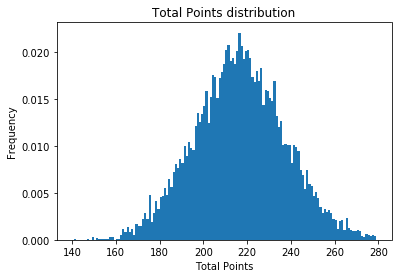

In [11]:
scores
spreads = []
total_points = [] #lowest 140, highest 300
bins_spread = []
bins_totalPoints = []
lower_bound = -70
for i in range(0,140):
    bins_spread.append(lower_bound + i)
    bins_totalPoints.append(140 + i)
    
for i in range(n):
    spreads.append(scores[i][0]-scores[i][1])
    total_points.append(scores[i][0] + scores[i][1])

#plt.hist(spreads, histtype='bar', bins=bins_spread)
plt.hist(total_points, density=True, histtype='bar', bins=bins_totalPoints)


#plt.xlabel('Spread')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
#plt.title('Spread distribution')
plt.title('Total Points distribution')
#print(bins)